## Compare step index fiber with GRIN fiber

### Setup input parameters

In [5]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sp
from scipy.optimize import root

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.modes import GrinLPMode, StepIndexLPMode
from mmfsim.speckle import DegenGrinSpeckle, DegenStepIndexSpeckle

fiber_dict = {'radius': 52e-6, 'wavelength': 1064e-9, 'n1': 1.466, 'n2': 1.45}
savefigs = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Define fibers

In [26]:
grin_fiber = GrinFiber(**fiber_dict)
print(grin_fiber)

GrinFiber instance with:
  - Radius: 26.0 um
  - Core index: 1.465
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.209
  - Number of guided LP modes: 64
  - Number of guided LP modes (counting degenerates): 113
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[1.465      0.         0.         1.        ]
 [1.46407036 1.         0.         2.        ]
 [1.46314072 2.         1.         1.        ]
 [1.46314072 2.         0.         3.        ]
 [1.46221107 3.         1.         2.        ]
 [1.46221107 3.         0.         4.        ]
 [1.46128143 4.         2.         1.        ]
 [1.46128143 4.         1.         3.        ]
 [1.46128143 4.         0.         5.        ]
 [1.46035179 5.         2.         2.        ]]


In [6]:
step_fiber = StepIndexFiber(**fiber_dict)
print(step_fiber)

C:\Users\saucourt\Coding\MMF_LP_modes\mmfsim\fiber.py:246: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))
C:\Users\saucourt\Coding\MMF_LP_modes\mmfsim\fiber.py:245: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)


StepIndexFiber instance with:
  - Radius: 52.0 um
  - Core index: 1.466
  - Cladding index: 1.45
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.216
  - Number of guided LP modes: 561
  - Number of guided LP modes (counting degenerates): 1101
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.4659797   0.          0.          1.        ]
 [ 1.46594846  2.          1.          1.        ]
 [ 1.46590741  4.          2.          1.        ]
 [ 1.46589303  1.          0.          2.        ]
 [ 1.4658571   6.          3.          1.        ]
 [ 1.46582722  3.          1.          2.        ]
 [ 1.46579786  8.          4.          1.        ]
 [ 1.46575129  5.          2.          2.        ]
 [ 1.46573712  2.          0.          3.        ]
 [ 1.46572991 10.          5.          1.        ]]


In [7]:
print(step_fiber._neff_hnm[0,0] - step_fiber._neff_hnm[-1,0])

0.01590061572169077


### Compare propagation constants and modes constellations

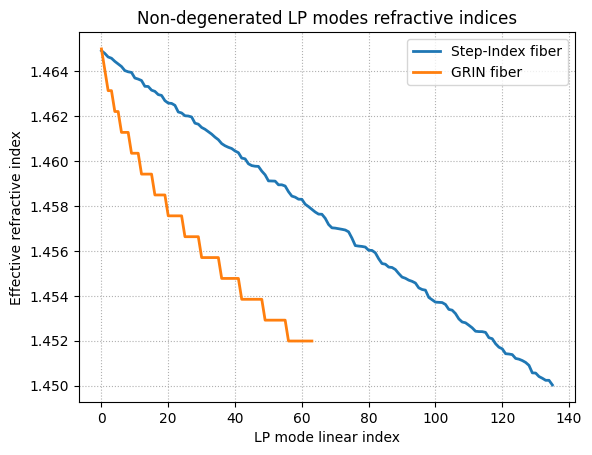

In [25]:
neff_grin = grin_fiber._neff_hnm[:, 0]
neff_step = step_fiber._neff_hnm[:, 0]

plt.figure()
plt.grid(ls=':')
plt.plot(neff_step, label="Step-Index fiber", lw=2)
plt.plot(neff_grin, label="GRIN fiber", lw=2)
plt.xlabel("LP mode linear index")
plt.ylabel("Effective refractive index")
plt.title("Non-degenerated LP modes refractive indices")
plt.legend()

if savefigs:
    plt.savefig("neff_vs_lpmodes.svg")

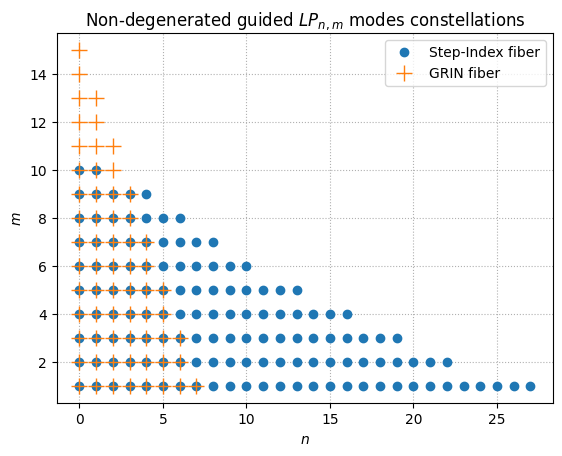

In [44]:
nm_LP_grin = grin_fiber._neff_hnm[:, 2:]
nm_LP_step = step_fiber._neff_hnm[:, 2:]
neff_step = step_fiber._neff_hnm[:, 0]

plt.figure()
plt.grid(ls=':')
plt.plot(nm_LP_step[:, 0], nm_LP_step[:, 1], label="Step-Index fiber", ls="None", marker='.', ms=12)
plt.plot(nm_LP_grin[:, 0], nm_LP_grin[:, 1], label="GRIN fiber", ls="None", marker='+', ms=12)
plt.xlabel(r"$n$")
plt.ylabel(r"$m$")
plt.title("Non-degenerated guided " + r"$LP_{n,m}$" +  " modes constellations")
plt.legend()

if savefigs:
    plt.savefig("lpmodes_constellations.svg")

### Compare LP modes

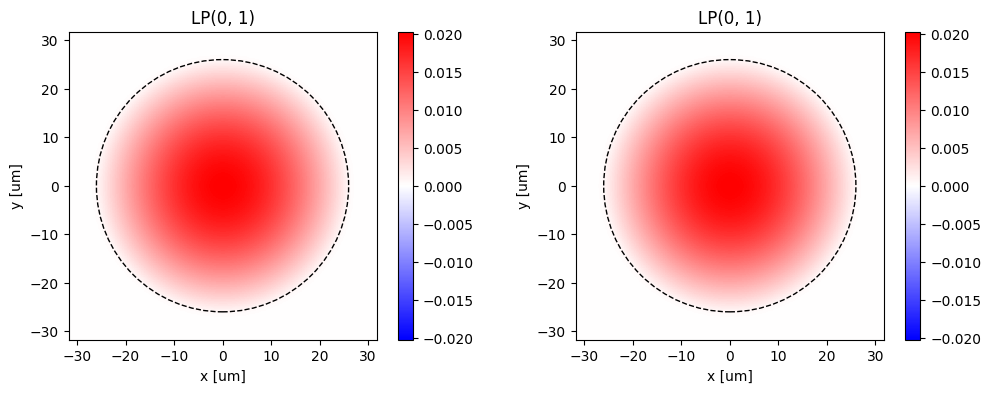

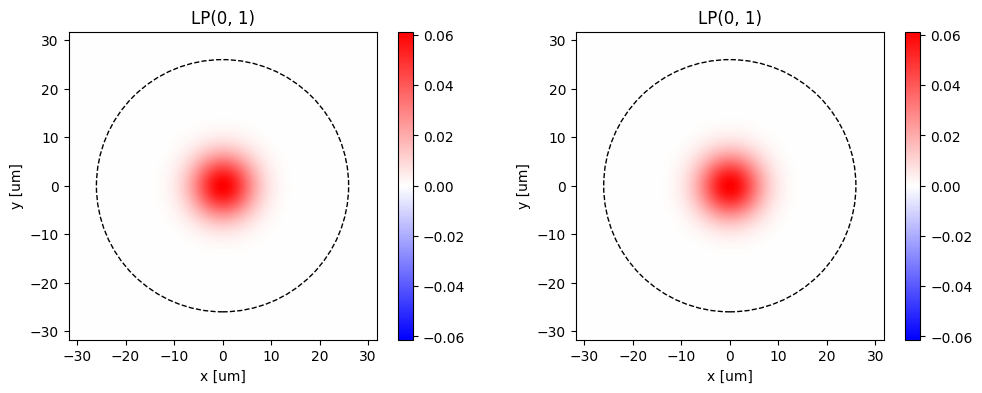

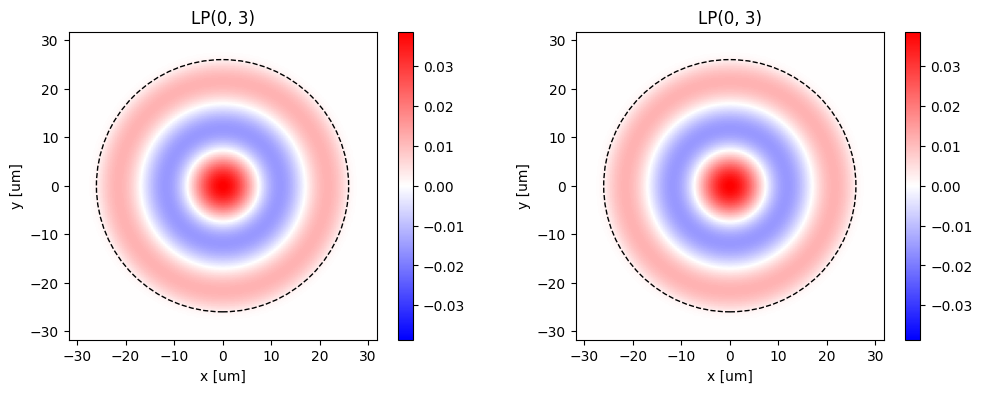

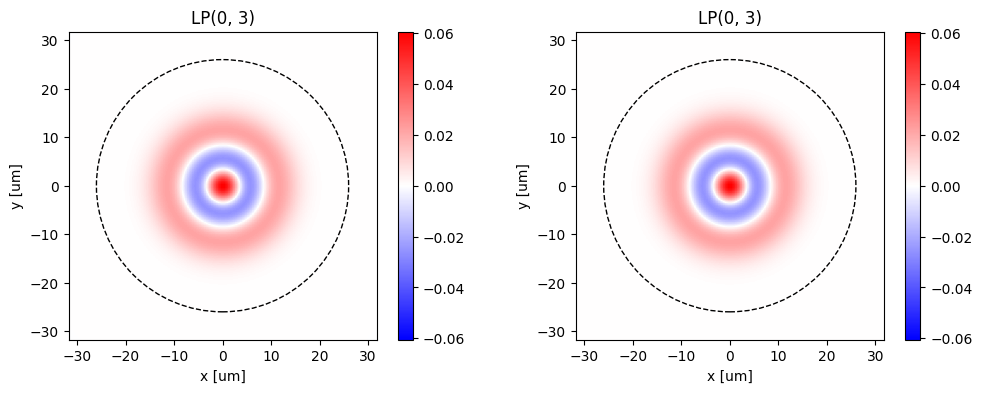

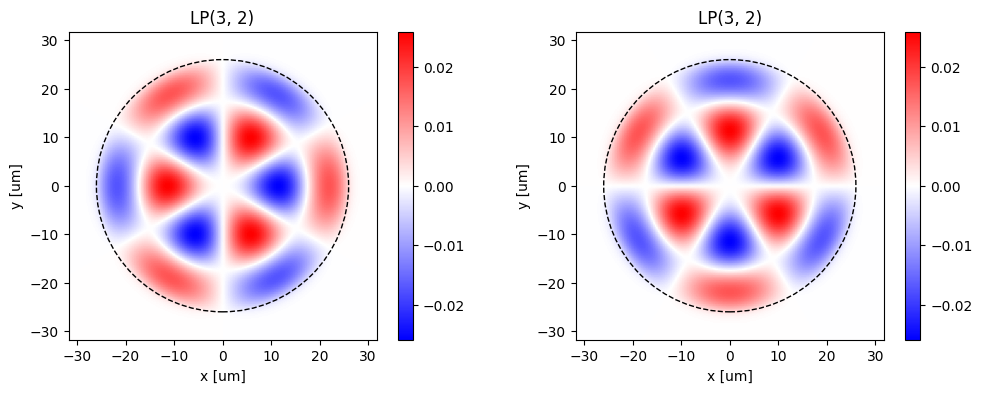

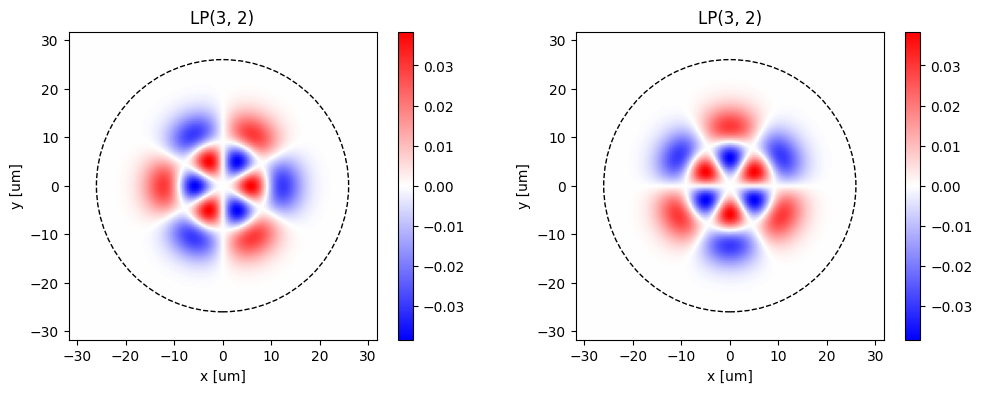

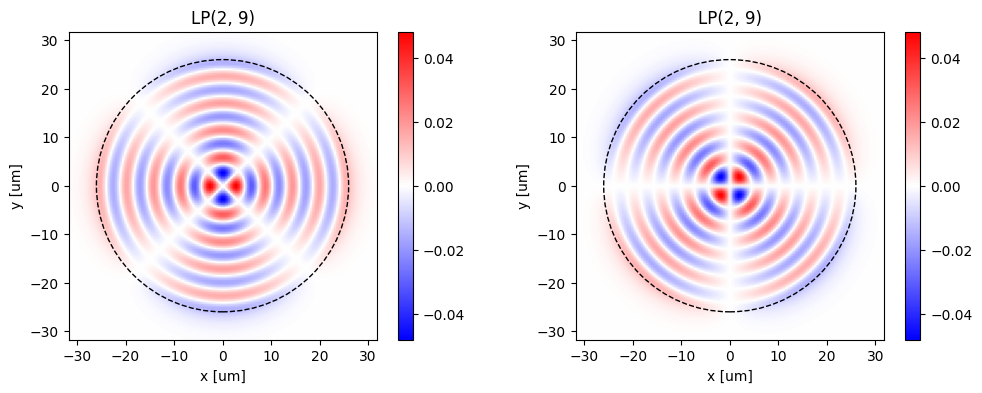

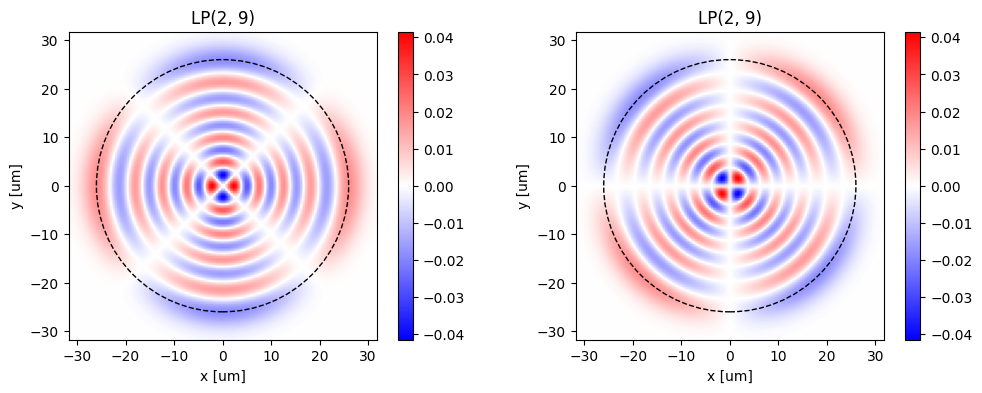

In [51]:
grid = Grid(pixel_size=0.5e-6)
nm_idxs = [(0, 1), (0, 3), (3, 2), (2, 9)]

for nm in nm_idxs:
    step_lp_mode = StepIndexLPMode(*nm)
    step_lp_mode.compute(step_fiber, grid)
    step_lp_mode.plot()

    if savefigs:
        plt.savefig(f"step_lp_{nm[0]},{nm[1]}.svg")

    grin_lp_mode = GrinLPMode(*nm)
    grin_lp_mode.compute(grin_fiber, grid)
    grin_lp_mode.plot()

    if savefigs:
        plt.savefig(f"grin_lp_{nm[0]},{nm[1]}.svg")

### Comparison of speckles

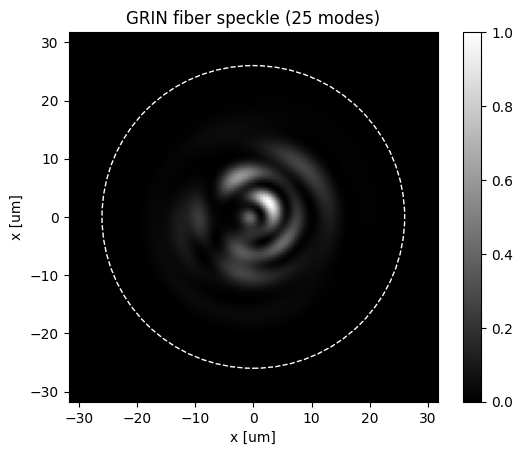

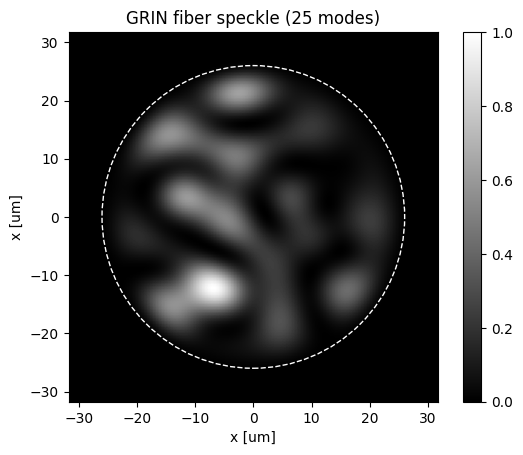

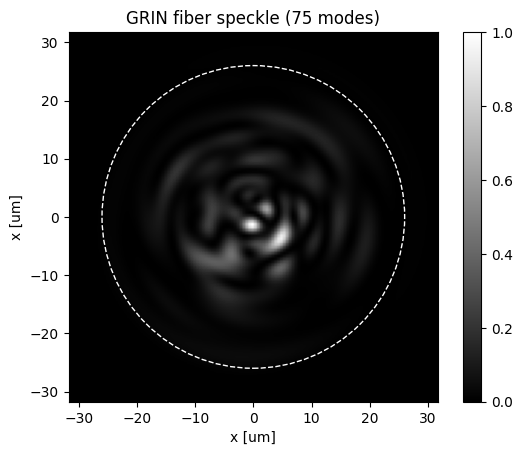

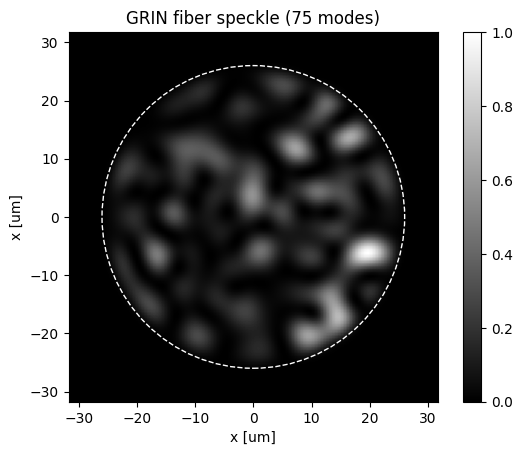

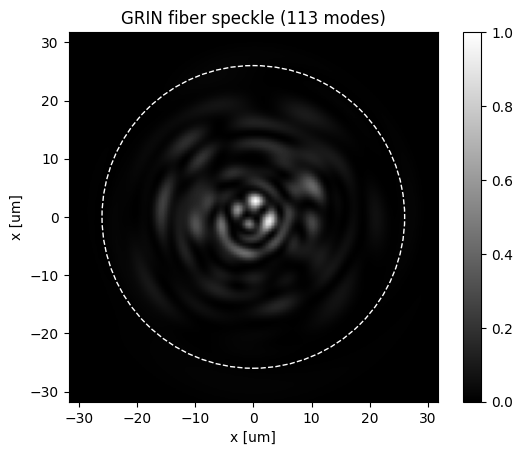

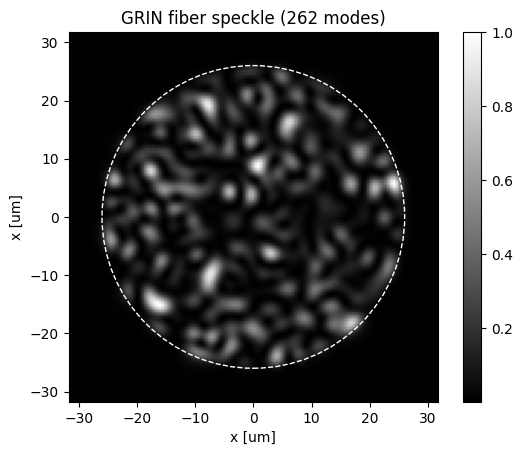

In [62]:
n_modes = [25, 75, -1]

for N in n_modes:
    if N == -1:
        grin_speckle = DegenGrinSpeckle(grin_fiber, grid, grin_fiber._N_modes_degen)
        step_speckle = DegenStepIndexSpeckle(step_fiber, grid, step_fiber._N_modes_degen)
    else:
        grin_speckle = DegenGrinSpeckle(grin_fiber, grid, N)
        step_speckle = DegenStepIndexSpeckle(step_fiber, grid, N)
    
    grin_speckle.compose()
    step_speckle.compose()

    grin_speckle.plot(cmap='gray')
    if savefigs:
        plt.savefig(f"grin_speckle_N={N}.svg")

    step_speckle.plot(cmap='gray')
    if savefigs:
        plt.savefig(f"step_speckle_N={N}.svg")